# Part 3: Unbiased Evaluation using a New Test Set

In this part, we are given a new test set (`/dsa/data/all_datasets/back_order/Kaggle_Test_Dataset_v2.csv`). We can now take advantage of the entire smart sample that we created in Part I. 

* Retrain a pipeline using the optimal parameters that the pipeline learned. We don't need to repeat GridSearch here. 

## Import modules as needed

In [26]:
import pandas as pd
import numpy as np
import joblib

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline

from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt

## Load smart sample and the best pipeline from Part II

In [2]:
X_train,y_train = joblib.load("data/sampled_data.pkl")
pipeline_best = joblib.load("third_pipeline.pkl")

In [3]:
pipeline_best.best_estimator_

Pipeline(steps=[('RFE',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=20)),
                ('RandomForest', RandomForestClassifier(n_estimators=1400))])


##  Retrain a pipeline using the full sampled training data set

Use the full sampled training data set to train the pipeline.

In [4]:
# Add code below this comment  (Question #E301)
# ----------------------------------

pipeline = Pipeline(steps=[('RFE',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=20)),
                ('RandomForest', RandomForestClassifier(n_estimators=1400))])

iso = IsolationForest()

In [5]:
inliers = iso.fit(X_train,y_train).predict(X_train) == 1

X_clean = X_train[inliers]
y_clean = y_train[inliers]

In [6]:
pipeline.fit(X_clean,y_clean)

Pipeline(steps=[('RFE',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=20)),
                ('RandomForest', RandomForestClassifier(n_estimators=1400))])

In [7]:
del X_clean, y_clean, X_train, y_train

### Save the trained model with the pickle library.

In [8]:
# Add code below this comment  
# -----------------------------

joblib.dump(pipeline,"final_pipeline.pkl")




['final_pipeline.pkl']


## Load the Testing Data and evaluate the model


In [9]:
# Preprocess the given test set  (Question #E302)
# ----------------------------------

Test = pd.read_csv("/dsa/data/all_datasets/back_order/Kaggle_Test_Dataset_v2.csv")

Test.head()





/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [10]:
Test.drop(["sku"], axis=1, inplace=True)

In [11]:
yes_no_columns = list(filter(lambda i: Test[i].dtype!=np.float64, Test.columns))

mappings = {"Yes":1,"No":0}

for column_name in yes_no_columns:
    mode = Test[column_name].apply(str).mode()[0]
    Test[column_name].fillna(mode, inplace=True)
    Test[column_name] = Test[column_name].map(mappings)

In [12]:
median = Test.lead_time.median()
Test.lead_time.fillna(median,inplace=True)

In [13]:
Test.dropna(inplace=True)

In [14]:
Test.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,62.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
1,9.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,1,0,0,0
2,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,0,0,0,1,0,0
3,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.78,0.75,0.0,0,0,1,1,0,0
4,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,0,0,0,1,0,0


In [15]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242075 entries, 0 to 242074
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   national_inv       242075 non-null  float64
 1   lead_time          242075 non-null  float64
 2   in_transit_qty     242075 non-null  float64
 3   forecast_3_month   242075 non-null  float64
 4   forecast_6_month   242075 non-null  float64
 5   forecast_9_month   242075 non-null  float64
 6   sales_1_month      242075 non-null  float64
 7   sales_3_month      242075 non-null  float64
 8   sales_6_month      242075 non-null  float64
 9   sales_9_month      242075 non-null  float64
 10  min_bank           242075 non-null  float64
 11  potential_issue    242075 non-null  int64  
 12  pieces_past_due    242075 non-null  float64
 13  perf_6_month_avg   242075 non-null  float64
 14  perf_12_month_avg  242075 non-null  float64
 15  local_bo_qty       242075 non-null  float64
 16  de

We can now predict and evaluate with the preprocessed test set. It would be interesting to see the performance with and without outliers removal from the test set. We can report confusion matrix, precision, recall, f1-score, accuracy, and other measures (if any). 

In [16]:
# Add code below this comment  (Question #E303)
# ----------------------------------

X_test = Test.iloc[:,:-1]
y_test = Test.went_on_backorder


y_pred = pipeline.predict(X_test)

pd.DataFrame(confusion_matrix(y_test,y_pred))


,0,1
0,225797,13590
1,844,1844


In [17]:
del Test

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    239387
           1       0.12      0.69      0.20      2688

    accuracy                           0.94    242075
   macro avg       0.56      0.81      0.59    242075
weighted avg       0.99      0.94      0.96    242075



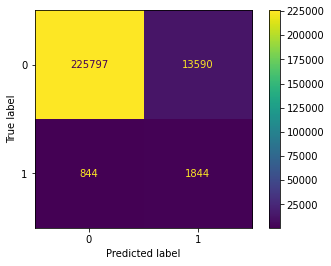

In [28]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

## Conclusion

## Reflect

Imagine you are data scientist that has been tasked with developing a system to save your 
company money by predicting and preventing back orders of parts in the supply chain.

Write a **brief summary** for "management" that details your findings, 
your level of certainty and trust in the models, 
and recommendations for operationalizing these models for the business.

# Save your notebook!
## Then `File > Close and Halt`